In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc


In [12]:
prob = "Acrobot"
window_size = 30
nb_episodes = 300


In [13]:
def compute_auc_and_std(data, nb_episodes):
    # data = np.load(filepath, allow_pickle=True)
    all_returns = data['episode_rewards']  # shape: (n_seeds, n_episodes)
    # print("all_returns ", all_returns, "\n")
    
    # print("all_returns shape:", all_returns.shape, "\n")
    aucs = []
    for rewards in all_returns:
        returns = rewards[:nb_episodes]
        x = np.arange(len(returns))
        aucs.append(auc(x, returns))

    auc_mean = np.mean(aucs)
    auc_std = np.std(aucs)
    return auc_mean, auc_std



In [14]:
base_path = f"C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\Results\\{prob}"



### Plot subfigures



In [15]:
AC_dict_auc_mean = {}
AC_dict_auc_std = {}


QRNN-ASNN-PF: AUC = -28689.00 ± 1296.94
QRNN-basic-PF: AUC = -31032.67 ± 1241.48
QRNN-rnd-PF: AUC = -31767.00 ± 1423.24
QRNN-RS: AUC = -37135.83 ± 798.06
50NN-ASNN-PF: AUC = -29807.50 ± 866.15
50NN-basic-PF: AUC = -59800.00 ± 0.00
50NN-rnd-PF: AUC = -33033.33 ± 1182.28
50NN-RS: AUC = -37649.33 ± 760.09
MSENN-ASNN-PF: AUC = -29086.00 ± 1516.73
MSENN-basic-PF: AUC = -31076.17 ± 2093.78
MSENN-rnd-PF: AUC = -33232.67 ± 1052.73
MSENN-RS: AUC = -37765.67 ± 890.60
############################################################# 

QRNN-ASNN-CEM: AUC = -26047.00 ± 599.26
QRNN-basic-CEM: AUC = -26957.67 ± 1256.68
QRNN-rnd-CEM: AUC = -27614.00 ± 573.17
50NN-ASNN-CEM: AUC = -27760.50 ± 366.96
50NN-basic-CEM: AUC = -59800.00 ± 0.00
50NN-rnd-CEM: AUC = -27966.17 ± 48.24
MSENN-ASNN-CEM: AUC = -26731.00 ± 1156.87
MSENN-basic-CEM: AUC = -26728.33 ± 1303.24
MSENN-rnd-CEM: AUC = -28454.17 ± 180.72
############################################################# 

DQN: AUC = -51376.33 ± 2239.63
IV-DQN: AUC = -4

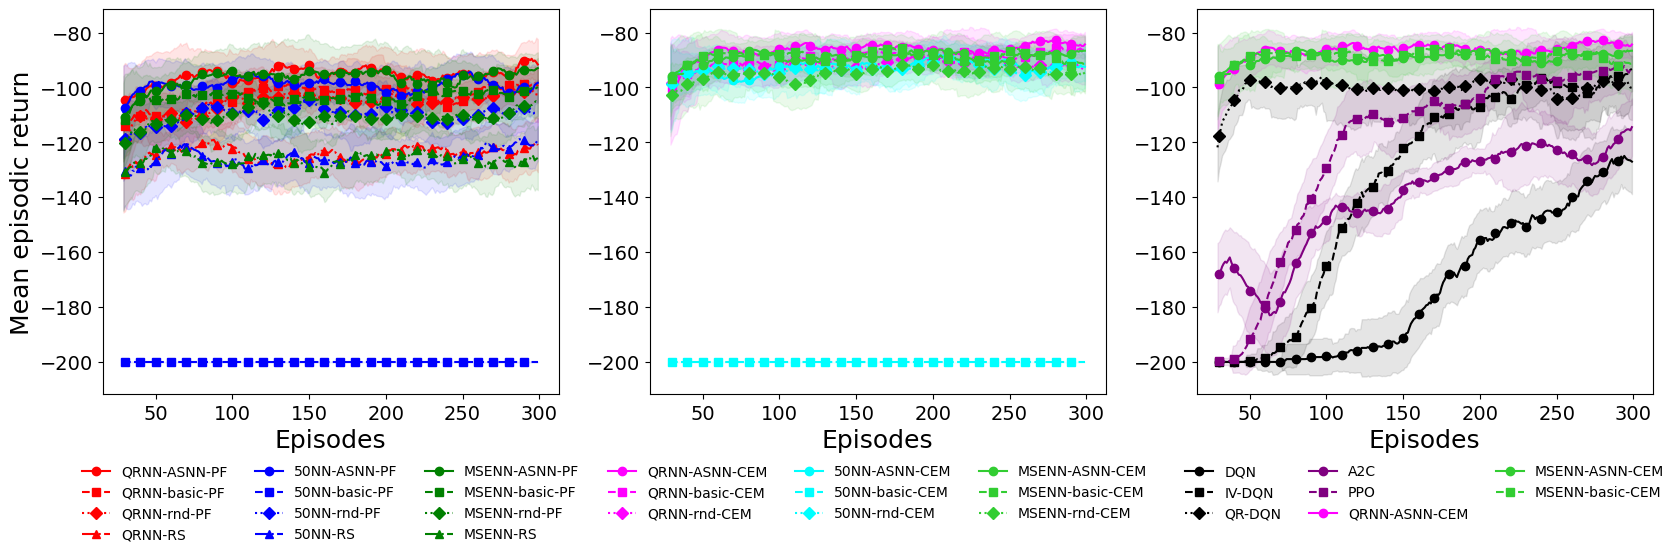

In [16]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)

plt.rcParams.update({'font.size': 20})
for i, ax in enumerate(axs):
    # ax.plot([1, 2, 3], [j*(i+1) for j in [1, 4, 9]])
    # ax.set_title(f"Plot {i+1}", fontsize=20)
    ax.set_xlabel("Episodes", fontsize=18)
    ax.tick_params(axis='both', labelsize=14)
    ax.yaxis.set_tick_params(labelleft=True)

axs[0].set_ylabel("Mean episodic return", fontsize=18)

QRNN = {'QRNN-ASNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_June25.npz',
    'QRNN-basic-PF': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6.npz',
    'QRNN-rnd-PF': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6.npz',
    'QRNN-RS': f'{base_path}\\{prob}_RS_mid_QRNN_May6.npz',}
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    AC_dict_auc_mean[label] = auc_mean
    AC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

FiftyNN = {'50NN-ASNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_June25.npz',
        #    '50NN-ASNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May6.npz',
    '50NN-basic-PF': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6.npz',
    '50NN-rnd-PF': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6.npz',
    '50NN-RS': f'{base_path}\\{prob}_RS_mid_50NN_May6.npz',}
color = 'blue'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    AC_dict_auc_mean[label] = auc_mean
    AC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

MSENN = {'MSENN-ASNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_June25.npz',
        #  'MSENN-ASNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6.npz',
    'MSENN-basic-PF': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6.npz',
    'MSENN-rnd-PF': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6.npz',
    'MSENN-RS': f'{base_path}\\{prob}_RS_mid_MSENN_May6.npz'}
color = 'green'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    AC_dict_auc_mean[label] = auc_mean
    AC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

# from matplotlib.lines import Line2D

# custom_legend = [
#     Line2D([0], [0], color='red', lw=2, label='QRNN'),
#     Line2D([0], [0], color='blue', lw=2, label='50NN'),
#     Line2D([0], [0], color='green', lw=2, label='MSENN'),
#     Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=6, label='ASGNN'),
#     Line2D([0], [0], color='black', marker='s', linestyle='None', markersize=6, label='QRNN-CEM'),
#     Line2D([0], [0], color='black', marker='^', linestyle='None', markersize=6, label='50NN-CEM')
# ]

# axs[0].legend(handles=custom_legend, loc='upper center', bbox_to_anchor=(0.5, -0.2),
#               ncol=3, fontsize=10, frameon=False)


###########################################################

print("############################################################# \n")

QRNN_CEM = {'QRNN-ASNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_June25_CEM.npz',
            # 'QRNN-ASNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May6_CEM.npz',
    'QRNN-basic-CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6_CEM.npz',
    'QRNN-rnd-CEM': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6_CEM.npz',}
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    AC_dict_auc_mean[label] = auc_mean
    AC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################################################

FiftyNN_CEM = {'50NN-ASNN-CEM': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_June25_CEM.npz',
    '50NN-basic-CEM': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6_CEM.npz',
    '50NN-rnd-CEM': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6_CEM.npz',}
color = 'aqua'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    AC_dict_auc_mean[label] = auc_mean
    AC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


########################################################

MSENN_CEM = {'MSENN-ASNN-CEM': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_June25_CEM.npz',
    'MSENN-basic-CEM': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6_CEM.npz',
    'MSENN-rnd-CEM': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6_CEM.npz',}
color = 'limegreen'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    AC_dict_auc_mean[label] = auc_mean
    AC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

#############################################################

print("############################################################# \n")

DQN_methods = {'DQN': f'{base_path}\\{prob}_DQN_results_July24.npz',
    'IV-DQN': f'{base_path}\\{prob}_IV_DQN_results_July24.npz',
    'QR-DQN': f'{base_path}\\{prob}_QR_DQN_results.npz',
    }

color = 'black'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in DQN_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    # print("mean_rewards ", data['ep[]'], "\n")
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    AC_dict_auc_mean[label] = auc_mean
    AC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################
########################
RL_methods = {'A2C': f'{base_path}\\{prob}_A2C_results_June27.npz',
    'PPO': f'{base_path}\\{prob}_PPO_results_June27.npz',
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_A2C_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_PPO_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_TQC_results.npz',
    }

color = 'purple'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in RL_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    AC_dict_auc_mean[label] = auc_mean
    AC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)


markers = ['o', 's', 'D', '^', 'v', 'x', '*']
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns

# QRNN-ASGNN-CEM
color_QRNN_ASGNN_CEM = 'magenta'
marker_QRNN_ASGNN_CEM = markers[0]
linestyle_QRNN_ASGNN_CEM = linestyles[0]
# data = np.load(f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May6_CEM.npz')
data = np.load(f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_June25_CEM.npz')
mean_rewards_QRNN_ASGNN_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_QRNN_ASGNN_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"QRNN-ASNN-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_QRNN_ASGNN_CEM = pd.Series(mean_rewards_QRNN_ASGNN_CEM).rolling(window=window_size).mean()
smoothed_std_QRNN_ASGNN_CEM = pd.Series(std_rewards_QRNN_ASGNN_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_QRNN_ASGNN_CEM, 
            label='QRNN-ASNN-CEM', 
            color=color_QRNN_ASGNN_CEM,
            marker=marker_QRNN_ASGNN_CEM,
            linestyle=linestyle_QRNN_ASGNN_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_QRNN_ASGNN_CEM)), 
                    smoothed_mean_QRNN_ASGNN_CEM - smoothed_std_QRNN_ASGNN_CEM, 
                    smoothed_mean_QRNN_ASGNN_CEM + smoothed_std_QRNN_ASGNN_CEM, 
                    color=color_QRNN_ASGNN_CEM, alpha=0.1)


# MSENN_ASGNN_CEM
color_MSENN_ASGNN_CEM = 'limegreen'
marker_MSENN_ASGNN_CEM = markers[0]
linestyle_MSENN_ASGNN_CEM = linestyles[0]
# data = np.load(f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May6_CEM.npz')
data = np.load(f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_June25_CEM.npz')
mean_rewards_MSENN_ASGNN_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_MSENN_ASGNN_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"MSENN_ASNN_CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_MSENN_ASGNN_CEM = pd.Series(mean_rewards_MSENN_ASGNN_CEM).rolling(window=window_size).mean()
smoothed_std_MSENN_ASGNN_CEM = pd.Series(std_rewards_MSENN_ASGNN_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_MSENN_ASGNN_CEM, 
            label="MSENN-ASNN-CEM", 
            color=color_MSENN_ASGNN_CEM,
            marker=marker_MSENN_ASGNN_CEM,
            linestyle=linestyle_MSENN_ASGNN_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_MSENN_ASGNN_CEM)), 
                    smoothed_mean_MSENN_ASGNN_CEM - smoothed_std_MSENN_ASGNN_CEM, 
                    smoothed_mean_MSENN_ASGNN_CEM + smoothed_std_MSENN_ASGNN_CEM, 
                    color=color_MSENN_ASGNN_CEM, alpha=0.1)

# MSENN_basic_CEM
color_MSENN_basic_CEM = 'limegreen'
marker_MSENN_basic_CEM = markers[1]
linestyle_MSENN_basic_CEM = linestyles[1]
data = np.load(f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6_CEM.npz')
mean_rewards_MSENN_basic_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_MSENN_basic_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"MSENN_basic_CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_MSENN_basic_CEM = pd.Series(mean_rewards_MSENN_basic_CEM).rolling(window=window_size).mean()
smoothed_std_MSENN_basic_CEM = pd.Series(std_rewards_MSENN_basic_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_MSENN_basic_CEM, 
            label="MSENN-basic-CEM", 
            color=color_MSENN_basic_CEM,
            marker=marker_MSENN_basic_CEM,
            linestyle=linestyle_MSENN_basic_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_MSENN_basic_CEM)), 
                    smoothed_mean_MSENN_basic_CEM - smoothed_std_MSENN_basic_CEM, 
                    smoothed_mean_MSENN_basic_CEM + smoothed_std_MSENN_basic_CEM, 
                    color=color_MSENN_basic_CEM, alpha=0.1)


# axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)



In [17]:
sorted_dict = dict(sorted(AC_dict_auc_mean.items(), key=lambda item: item[1], reverse=True)[:6])
sorted_dict


{'QRNN-ASNN-CEM': -26047.0,
 'MSENN-basic-CEM': -26728.333333333332,
 'MSENN-ASNN-CEM': -26731.0,
 'QRNN-basic-CEM': -26957.666666666668,
 'QRNN-rnd-CEM': -27614.0,
 '50NN-ASNN-CEM': -27760.5}

In [18]:
AC_dict_auc_mean, AC_dict_auc_std


({'QRNN-ASNN-PF': -28689.0,
  'QRNN-basic-PF': -31032.666666666668,
  'QRNN-rnd-PF': -31767.0,
  'QRNN-RS': -37135.833333333336,
  '50NN-ASNN-PF': -29807.5,
  '50NN-basic-PF': -59800.0,
  '50NN-rnd-PF': -33033.333333333336,
  '50NN-RS': -37649.333333333336,
  'MSENN-ASNN-PF': -29086.0,
  'MSENN-basic-PF': -31076.166666666668,
  'MSENN-rnd-PF': -33232.666666666664,
  'MSENN-RS': -37765.666666666664,
  'QRNN-ASNN-CEM': -26047.0,
  'QRNN-basic-CEM': -26957.666666666668,
  'QRNN-rnd-CEM': -27614.0,
  '50NN-ASNN-CEM': -27760.5,
  '50NN-basic-CEM': -59800.0,
  '50NN-rnd-CEM': -27966.166666666668,
  'MSENN-ASNN-CEM': -26731.0,
  'MSENN-basic-CEM': -26728.333333333332,
  'MSENN-rnd-CEM': -28454.166666666668,
  'DQN': -51376.333333333336,
  'IV-DQN': -40393.0,
  'QR-DQN': -30390.833333333332,
  'A2C': -41984.333333333336,
  'PPO': -36909.666666666664},
 {'QRNN-ASNN-PF': 1296.9350407788356,
  'QRNN-basic-PF': 1241.4830736752806,
  'QRNN-rnd-PF': 1423.2401999194187,
  'QRNN-RS': 798.0580945158204

In [19]:
import json

# writing dictionary to a file as JSON
with open('C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\AUC_data\\AC_auc_mean.json', 'w') as f:
    json.dump(AC_dict_auc_mean, f)

with open('C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\AUC_data\\AC_auc_std.json', 'w') as f:
    json.dump(AC_dict_auc_std, f)


In [20]:
for key, value in AC_dict_auc_mean.items():
    print(f"{key}: {value:.2f} ± {AC_dict_auc_std[key]:.2f}")
    

QRNN-ASNN-PF: -28689.00 ± 1296.94
QRNN-basic-PF: -31032.67 ± 1241.48
QRNN-rnd-PF: -31767.00 ± 1423.24
QRNN-RS: -37135.83 ± 798.06
50NN-ASNN-PF: -29807.50 ± 866.15
50NN-basic-PF: -59800.00 ± 0.00
50NN-rnd-PF: -33033.33 ± 1182.28
50NN-RS: -37649.33 ± 760.09
MSENN-ASNN-PF: -29086.00 ± 1516.73
MSENN-basic-PF: -31076.17 ± 2093.78
MSENN-rnd-PF: -33232.67 ± 1052.73
MSENN-RS: -37765.67 ± 890.60
QRNN-ASNN-CEM: -26047.00 ± 599.26
QRNN-basic-CEM: -26957.67 ± 1256.68
QRNN-rnd-CEM: -27614.00 ± 573.17
50NN-ASNN-CEM: -27760.50 ± 366.96
50NN-basic-CEM: -59800.00 ± 0.00
50NN-rnd-CEM: -27966.17 ± 48.24
MSENN-ASNN-CEM: -26731.00 ± 1156.87
MSENN-basic-CEM: -26728.33 ± 1303.24
MSENN-rnd-CEM: -28454.17 ± 180.72
DQN: -51376.33 ± 2239.63
IV-DQN: -40393.00 ± 297.23
QR-DQN: -30390.83 ± 2202.62
A2C: -41984.33 ± 7789.17
PPO: -36909.67 ± 1895.65
